In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [2]:
train = pd.read_csv('train.csv',header=0)
train_pre = pd.read_excel('train_Preprocessing.xlsx',header=0,sheetname='Log Returns')
test_pre = pd.read_excel('train_Preprocessing.xlsx',header=0,sheetname='test_LogReturns')
test = pd.read_csv('test.csv',header=0)
print train_pre.shape,train.shape,test.shape,test_pre.shape

(2999, 115) (3000, 102) (1361, 101) (1361, 104)


In [32]:
train['Y'] = train['Y'].astype('category')
train_pre['Y'] = train_pre['Y'].astype('category')

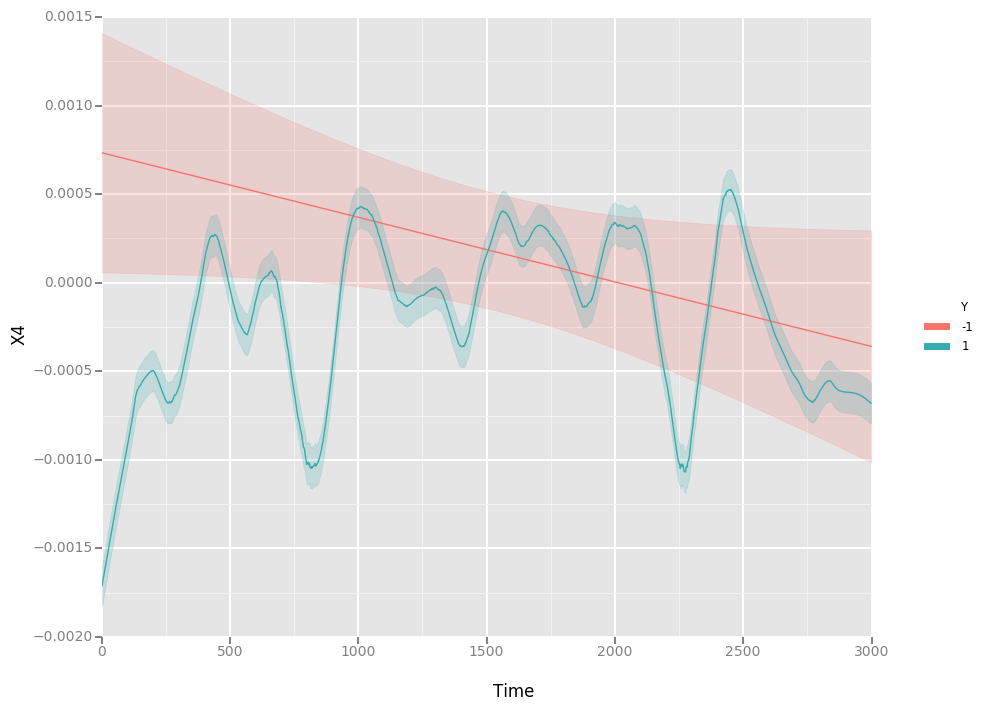

<ggplot: (8734440666621)>

In [120]:
from ggplot import *
%matplotlib inline

ggplot(aes(x='Time', y='X4',colour='Y'), data=train_pre) +\
    stat_smooth(colour='black', span=0.1)

In [122]:
#For Normal analysis with log return and direct
X = train.values[:,1:101]
col = list(np.concatenate((range(1,101),[107,108]),axis=0))
#X_tra = np.power(train_pre.values[:,col],10)
#X_tst = np.power(test_pre.values[:,1:103],10)
X_tra = train_pre.values[:,col]
X_tst = test_pre.values[:,1:103]
Y = train.values[:,101]
X_test = test.values[:,1:101]
print X.shape,X_tra.shape,X_tst.shape,Y.shape

(3000, 100) (2999, 102) (1361, 102) (3000,)


In [123]:
#For removing zeros and runnning
ind = abs(np.sum(train_pre.values[:,1:101],axis=1)) != 0
brk = abs(np.sum(train_pre.values[:,1:101],axis=1)) == 0
train_time = np.zeros((X_tra.shape[0],3))
train_time[:,0][brk] = 1
train_time[1:,1][brk] = 1
train_time[:,2] = np.hstack((0,train_time[:2998,0]))
np.count_nonzero(train_time[:,2] == 1) 

/home/mckc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2998 but corresponding boolean dimension is 2999


107

In [129]:
#For features with change in mean
mean_col = np.sum(X_tra[:,:100],axis=1)
#new = np.subtract(X_tra[:,:100],mean_col)

In [131]:
mean_col.shape

(2999,)

In [51]:
post_holiday = []
iter = 1
for i in range(2999):
    if (brk[i] == True):
        iter = 1;
    post_holiday.append(iter)
    iter +=1
post_holiday = np.array(post_holiday)
X_tra = np.hstack((X_tra,post_holiday.reshape(2999,1)))

In [4]:
from sklearn.utils import shuffle
#X,Y = shuffle(X,Y)
X_tra,Y = shuffle(X_tra,Y[1:])
print X.shape,Y.shape

(3000, 100) (2999,)


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
clf = LogisticRegression(verbose=0,n_jobs=-1,multi_class='multinomial',solver='lbfgs',max_iter=100,warm_start=True)
rf = RandomForestClassifier(200,verbose=0,oob_score=True,n_jobs=-1,warm_start=True)

scores = cross_validation.cross_val_score(clf, X_tra[:,:102], Y[1:].astype(np.int), cv=10)
#scores = cross_validation.cross_val_score(clf, np.concatenate((X_tra[:,:102],mean_col.reshape(2999,1)),axis=1), Y[1:].astype(np.int), cv=10)

print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.52159468  0.52        0.59666667  0.58333333  0.52666667  0.58        0.52
  0.62333333  0.46822742  0.51170569]
Accuracy: 0.55 (+/- 0.09)


[ 0.51827243  0.52        0.58666667  0.59        0.52        0.56666667
  0.51666667  0.61666667  0.46488294  0.49832776]
Accuracy: 0.54 (+/- 0.09)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import xgboost as xgb

model = xgb.XGBClassifier(max_depth= 16,
                                  learning_rate=  0.1162,
                          n_estimators = 841,
                                  gamma= 1,
                                  min_child_weight= 3.73,
                                  max_delta_step=0.0095,
                                subsample=0.6211,
                                  colsample_bytree=0.5183)


svm = svm.SVC(kernel='linear', C=1)
nnet = MLPClassifier(solver='adam', alpha=1e-5,batch_size = 1,max_iter=500,learning_rate_init =0.00001,
                   hidden_layer_sizes=(50,2), random_state=1)
clf = LogisticRegression(verbose=0,n_jobs=-1,multi_class='multinomial',solver='lbfgs',max_iter=100,warm_start=True)
rf = RandomForestClassifier(200,verbose=0,oob_score=True,n_jobs=-1,warm_start=True)

#scores = cross_validation.cross_val_score(clf, np.concatenate((X_tra[:,:102],lag),axis=1), Y[1:], cv=10)
scores = cross_validation.cross_val_score(clf, np.concatenate((X_tra[:,:102],lag),axis=1), Y, cv=10)

predicted_logistic = cross_val_predict(clf,np.concatenate((X_tra[:,:102],lag),axis=1), Y, cv=10)
predicted_svm = cross_val_predict(svm,np.concatenate((X_tra[:,:102],lag),axis=1), Y, cv=10)
predicted_nnet = cross_val_predict(nnet,np.concatenate((X_tra[:,:102],lag),axis=1), Y, cv=10)
predicted_rf = cross_val_predict(rf,np.concatenate((X_tra[:,:102],lag),axis=1), Y, cv=10)
predicted_xgb = cross_val_predict(model,np.concatenate((X_tra[:,:102],lag),axis=1), Y, cv=10)

print accuracy_score(Y, predicted) 
#scores = cross_validation.cross_val_score(clf, X_tra, Y, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

blend = np.transpose(np.vstack((predicted_logistic,predicted_svm,predicted_rf,predicted_svm,predicted_xgb)))
print blend.shape

scores = cross_validation.cross_val_score(model, blend, Y, cv=10)
print scores
print("blendiong Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

fprint loat(sum(pd.DataFrame(blend).mode(axis=1)[0]==Y[1:]))/2999

In [244]:
num = np.array(range(203)).astype(np.character)
np.savetxt('t.txt',np.concatenate((num.reshape(1,203),np.concatenate((Y[1:].reshape(2999,1),X_tra[:,:102],new),axis=1)),axis=0),delimiter=',',fmt='%s')

In [263]:
Y_test = model.predict(X_test)

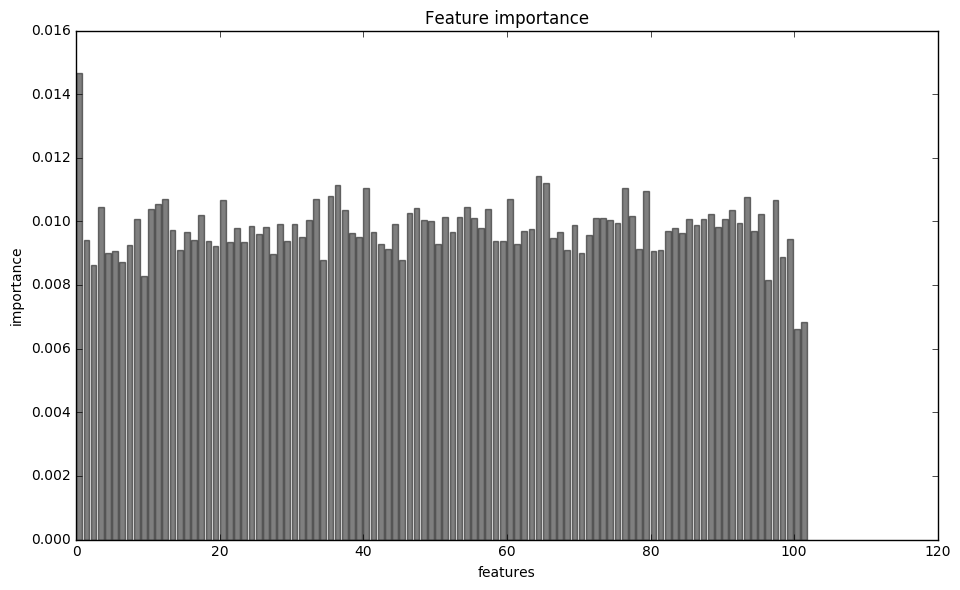

In [5]:
%matplotlib inline
import matplotlib.pylab as plt

recognizer = RandomForestClassifier(200,verbose=0,oob_score=True,n_jobs=-1,warm_start=True)
recognizer.fit(X_tra,Y)

plt.figure(figsize=(6 * 1.618, 6))
bar_width = 0.35
plt.bar(range(0,102), recognizer.feature_importances_, color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
#plt.xticks(index + bar_width, cols)
plt.tight_layout()
plt.show()

In [6]:
print X_tra.shape,X_tst.shape
comp = np.vstack((X_tra,X_tst)).astype(np.float32)
print type(comp)

(2999, 102) (1361, 102)
<type 'numpy.ndarray'>


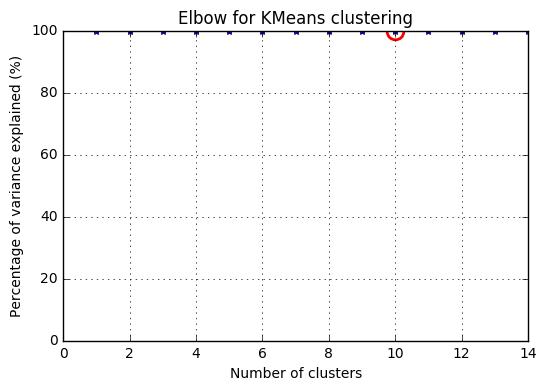

In [7]:
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
%matplotlib inline
import matplotlib.pylab as plt

##### cluster data into K=1..20 clusters #####
K_MAX = 14
KK = range(1,K_MAX+1,1)

KM = [kmeans(comp,k,iter=200) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(comp, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss      

##### plots #####
kIdx = 9        # K=10
# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

In [58]:
from sklearn.cluster import KMeans
from sklearn import cross_validation

clusters = KMeans( n_clusters=8
                  , n_init=10,n_jobs=-1,max_iter =500).fit(comp).labels_
clf = LogisticRegression(verbose=0,n_jobs=1,multi_class='multinomial',solver='lbfgs',max_iter=100,warm_start=True)

scores = cross_validation.cross_val_score(clf, np.hstack((X_tra[:,:],clusters[:2999].reshape(2999,1))), Y, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(clf, X_tra, Y, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.57142857  0.54666667  0.53666667  0.55666667  0.48666667  0.53333333
  0.50333333  0.52        0.51839465  0.56521739]
Accuracy: 0.53 (+/- 0.05)
[ 0.56146179  0.54666667  0.53666667  0.55        0.48        0.55333333
  0.5         0.51666667  0.51839465  0.57859532]
Accuracy: 0.53 (+/- 0.06)


In [60]:
clf =LogisticRegression(verbose=0,n_jobs=1,multi_class='multinomial',solver='lbfgs',max_iter=100,warm_start=True)

results = np.zeros((1000,8))

for i in set(clusters):
    c_train = X_tra[clusters[:1999]!=i]
    c_test = X_tra[clusters[:1999]==i]
    scores = cross_validation.cross_val_score(clf,c_train[:,1:], Y[[clusters[:1999]!=i]], cv=10)
    clf.fit(c_train[:,1:], Y[[clusters[:1999]!=i]])
    results[:,i] = clf.predict(X_tra[1999:,1:])
    num = np.array([clusters[:1999]==i]).sum()
    acc = float(sum(clf.predict(c_test[:,1:])==Y[clusters[:1999]==i]))/num
    print(acc)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('ensemble accuracy',float(sum(pd.DataFrame(results).mode(axis=1)[0]==Y[1999:]))/1000)

/home/mckc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2999 but corresponding boolean dimension is 1999
/home/mckc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2999 but corresponding boolean dimension is 1999
/home/mckc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2999 but corresponding boolean dimension is 1999
/home/mckc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2999 but corresponding boolean dimension is 1999
/home/mckc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: boolean

0.536585365854
Accuracy: 0.52 (+/- 0.09)
0.537254901961
Accuracy: 0.52 (+/- 0.09)
0.528735632184
Accuracy: 0.53 (+/- 0.07)
0.517699115044
Accuracy: 0.52 (+/- 0.08)
0.509493670886
Accuracy: 0.52 (+/- 0.06)
0.51912568306
Accuracy: 0.53 (+/- 0.11)
0.524916943522
Accuracy: 0.52 (+/- 0.07)
0.538461538462
Accuracy: 0.51 (+/- 0.09)
('ensemble accuracy', 0.526)


In [61]:
clf = LogisticRegression(verbose=0,n_jobs=1,multi_class='multinomial',solver='lbfgs',max_iter=200,warm_start=True)

results = np.zeros((1361,9))

for i in set(clusters):
    c_train = X_tra[clusters[:2999]!=i]
    c_test = X_tra[clusters[:2999]==i]
    scores = cross_validation.cross_val_score(clf,c_train, Y[[clusters[:2999]!=i]], cv=10)
    clf.fit(c_train, Y[[clusters[:2999]!=i]])
    results[:,i] = clf.predict(X_tst)
    num = np.array([clusters[:2999]==i]).sum()
    acc = float(sum(clf.predict(c_test)==Y[clusters[:2999]==i]))/num
    print(acc)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
results[:,9] = pd.DataFrame(results).mode(axis=1)[0]
Y_test = results[:,9]

ValueError: X has 102 features per sample; expecting 103

In [187]:
import xgboost as xgb
from sklearn.cross_validation import cross_val_score

def xgboostcv(max_depth,
              learning_rate,
              n_estimators,
              gamma,
              min_child_weight,
              max_delta_step,
              subsample,
              colsample_bytree,
              silent=True,
              nthread=-1):
    
    a = cross_val_score(xgb.XGBClassifier(max_depth=int(max_depth),
                                             learning_rate=learning_rate,
                                             n_estimators=int(n_estimators),
                                             silent=silent,
                                             nthread=nthread,
                                             gamma=gamma,
                                             min_child_weight=min_child_weight,
                                             max_delta_step=max_delta_step,
                                             subsample=subsample,
                                             colsample_bytree=colsample_bytree
                                         ),
                           X_tra,
                           Y[1:].astype(np.int),
                           "accuracy",
                           cv=10)
    print("Results: %.2f%% (%.2f%%)" % (a.mean()*100, a.std()*100))
    return a.mean()

In [188]:
from bayes_opt import BayesianOptimization
xgboostBO = BayesianOptimization(xgboostcv,
                                 {'max_depth': (2, 20),
                                  'learning_rate': (0.001, 0.3),
                                  'n_estimators': (50, 1000),
                                  'gamma': (1, 0.01),
                                  'min_child_weight': (1, 10),
                                  'max_delta_step': (0, 0.1),
                                  'subsample': (0.5, 0.99),
                                  'colsample_bytree' :(0.5, 0.99)
                                  })

xgboostBO.maximize()

print('Final Results')
print('XGBOOST: %f' % xgboostBO.res['max']['max_val'])

Initialization
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   learning_rate |   max_delta_step |   max_depth |   min_child_weight |   n_estimators |   subsample | 
Results: 52.08% (3.84%)
    1 | 01m40s |    0.52082 |             0.7831 |    0.0699 |          0.0972 |           0.0075 |     14.2415 |             7.6197 |       980.7204 |      0.7370 | 
Results: 50.58% (3.92%)
    2 | 00m52s |    0.50580 |             0.6890 |    0.5989 |          0.0574 |           0.0315 |      6.8755 |             6.4888 |       717.2965 |      0.8895 | 
Results: 47.78% (3.97%)
    3 | 00m43s |    0.47778 |             0.6116 |    0.8015 |          0.2622 |           0.0406 |      6.6348 |             9.5530 |       809.2741 |      0.8509 | 


KeyboardInterrupt: 

In [198]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.datasets import make_classification

X, y =X_tra,(Y[1:].astype(np.int)>0).astype(np.int)


def xgbcv(max_depth, eta, colsample_bytree, subsample, num_round):
    print("XGB", locals())

    dtrain = xgb.DMatrix(X, label=y)

    params = {
        'booster': 'gblinear',
        'objective': 'binary:logistic',
        'silent': 1,
        'max_depth': int(round(max_depth)),
        'eta': eta,
        'colsample_bytree': colsample_bytree,
        'subsample': subsample,
#        'num_class': 2,
#        'eval_metric': 'mlogloss',
        'seed': 42
    }

    r = xgb.cv(params, dtrain, int(round(num_round)), nfold=10, seed=45, show_stdv=False)

    return -r['test-error-mean'].mean()


xgbBO = BayesianOptimization(xgbcv, {
    'max_depth': (2, 6),
    'eta': (0.01, 0.8),
    'colsample_bytree': (0.25, 1.0),
    'subsample': (0.25, 1.0),
    'num_round': (20, 30),
}, verbose=True)

xgbBO.maximize(init_points=32, n_iter=6)

Initialization
--------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |       eta |   max_depth |   num_round |   subsample | 
('XGB', {'num_round': 24.983307244466513, 'subsample': 0.25557130760092905, 'eta': 0.70869373174243289, 'colsample_bytree': 0.67018081084955283, 'max_depth': 4.2944146810166135})
    1 | 00m00s |   -0.48682 |             0.6702 |    0.7087 |      4.2944 |     24.9833 |      0.2556 | 
('XGB', {'num_round': 20.827756301869524, 'subsample': 0.45490290826854152, 'eta': 0.6167222781809516, 'colsample_bytree': 0.43062289664638342, 'max_depth': 5.6710076965848195})
    2 | 00m00s |   -0.48649 |             0.4306 |    0.6167 |      5.6710 |     20.8278 |      0.4549 | 
('XGB', {'num_round': 28.142616970720006, 'subsample': 0.38143956636056375, 'eta': 0.49812363304551055, 'colsample_bytree': 0.97868534501083049, 'max_depth': 2.0538024320358708})
    3 | 00m00s |   -0.4846

/home/mckc/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00026762]), 'nit': 4, 'funcalls': 48}
  " state: %s" % convergence_dict)


   34 | 00m01s |   -0.46217 |             0.9447 |    0.0100 |      2.3403 |     25.9805 |      0.9387 | 
('XGB', {'num_round': 29.944699661640119, 'subsample': 0.83743653787879202, 'eta': 0.093950368680478569, 'colsample_bytree': 0.72541846240131291, 'max_depth': 2.9797958762481769})


/home/mckc/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00022634]), 'nit': 3, 'funcalls': 50}
  " state: %s" % convergence_dict)


   35 | 00m01s |   -0.47089 |             0.7254 |    0.0940 |      2.9798 |     29.9447 |      0.8374 | 
('XGB', {'num_round': 20.516166138637349, 'subsample': 0.59856449582901772, 'eta': 0.088141775978150524, 'colsample_bytree': 0.90304589147817405, 'max_depth': 2.7098641431159298})
   36 | 00m01s |   -0.46872 |             0.9030 |    0.0881 |      2.7099 |     20.5162 |      0.5986 | 
('XGB', {'num_round': 20.876085744819864, 'subsample': 0.31860719917017688, 'eta': 0.079758733106898766, 'colsample_bytree': 0.26616809406783432, 'max_depth': 4.0323976636148693})


/home/mckc/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00029054]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)


   37 | 00m01s |   -0.46863 |             0.2662 |    0.0798 |      4.0324 |     20.8761 |      0.3186 | 
('XGB', {'num_round': 22.431784849187228, 'subsample': 0.89054287299429258, 'eta': 0.060293234997762651, 'colsample_bytree': 0.87872227766101818, 'max_depth': 5.4918307456337292})
   38 | 00m01s |   -0.46812 |             0.8787 |    0.0603 |      5.4918 |     22.4318 |      0.8905 | 


In [62]:
submission = np.transpose(np.vstack((np.hstack(('Time',test.values[:,0])),np.hstack(('Y',Y_test)))))
np.savetxt('submission.txt',submission,delimiter=',',fmt='%s')